In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Importing the data

In [3]:
my_data_Shakespeare=pd.read_csv('C:/Users/Caio Laptop/OneDrive - The University of Kansas/Documents/PhD/11. Courses/19. EECS 731 - Introduction to Data Science/Homework/Section 4 - HW/Shakespeare_data.csv')

In [4]:
#Taking a look in my data

In [5]:
my_data_Shakespeare.head()

,Dataline,Play,PlayerLinenumber,ActSceneLine,Player,PlayerLine
0,1,Henry IV,NaN,NaN,NaN,ACT I
1,2,Henry IV,NaN,NaN,NaN,SCENE I. London. The palace.
2,3,Henry IV,NaN,NaN,NaN,"Enter KING HENRY, LORD JOHN OF LANCASTER, the ..."
3,4,Henry IV,1.0,1.1.1,KING HENRY IV,"So shaken as we are, so wan with care,"
4,5,Henry IV,1.0,1.1.2,KING HENRY IV,"Find we a time for frighted peace to pant,"


In [6]:
my_data_Shakespeare.shape

(111396, 6)

In [7]:
my_data_Shakespeare.index

RangeIndex(start=0, stop=111396, step=1)

In [8]:
my_data_Shakespeare.columns

Index(['Dataline', 'Play', 'PlayerLinenumber', 'ActSceneLine', 'Player',
       'PlayerLine'],
      dtype='object')

In [9]:
my_data_Shakespeare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111396 entries, 0 to 111395
Data columns (total 6 columns):
Dataline            111396 non-null int64
Play                111396 non-null object
PlayerLinenumber    111393 non-null float64
ActSceneLine        105153 non-null object
Player              111389 non-null object
PlayerLine          111396 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 3.4+ MB


In [10]:
my_data_Shakespeare.count()

Dataline            111396
Play                111396
PlayerLinenumber    111393
ActSceneLine        105153
Player              111389
PlayerLine          111396
dtype: int64

In [11]:
#Want to know how many Play we have

In [12]:
my_data_Shakespeare["Play"].value_counts()

Hamlet                      4244
Coriolanus                  3992
Cymbeline                   3958
Richard III                 3941
Antony and Cleopatra        3862
King Lear                   3766
Othello                     3762
Troilus and Cressida        3711
A Winters Tale              3489
Henry VIII                  3419
Henry V                     3395
Henry VI Part 2             3334
Romeo and Juliet            3313
Henry IV                    3205
Henry VI Part 3             3138
Alls well that ends well    3083
Measure for measure         2998
Loves Labours Lost          2986
Henry VI Part 1             2983
Richard II                  2937
Merry Wives of Windsor      2831
As you like it              2822
Taming of the Shrew         2806
Merchant of Venice          2802
Julius Caesar               2771
King John                   2766
Titus Andronicus            2726
Much Ado about nothing      2704
Timon of Athens             2662
Twelfth Night               2648
Pericles  

In [13]:
#Want to know how many Player we have

In [14]:
my_data_Shakespeare["Player"].value_counts()

GLOUCESTER          1920
HAMLET              1582
IAGO                1161
FALSTAFF            1117
KING HENRY V        1086
BRUTUS              1051
OTHELLO              928
MARK ANTONY          927
KING HENRY VI        917
DUKE VINCENTIO       909
TIMON                875
QUEEN MARGARET       847
Clown                804
KING LEAR            801
KING RICHARD II      794
MACBETH              783
TITUS ANDRONICUS     768
PROSPERO             745
CLEOPATRA            742
YORK                 740
HELENA               735
LEONTES              720
CORIOLANUS           717
ROSALIND             711
PORTIA               707
WARWICK              690
BUCKINGHAM           668
ROMEO                651
BIRON                647
PERICLES             645
                    ... 
Second Knight          1
PHILIP                 1
Third Musician         1
Some Speak             1
First Commoner         1
Third Stranger         1
VAUGHAN                1
ARMADO                 1
JOSEPH                 1


In [15]:
#Creating new variables

In [16]:
counts_player=my_data_Shakespeare["Player"].value_counts()
counts_player[counts_player > 1000]

GLOUCESTER      1920
HAMLET          1582
IAGO            1161
FALSTAFF        1117
KING HENRY V    1086
BRUTUS          1051
Name: Player, dtype: int64

In [17]:
counts_play=my_data_Shakespeare["Play"].value_counts()
counts_play[counts_play > 3500]

Hamlet                  4244
Coriolanus              3992
Cymbeline               3958
Richard III             3941
Antony and Cleopatra    3862
King Lear               3766
Othello                 3762
Troilus and Cressida    3711
Name: Play, dtype: int64

In [18]:
# Let's work only with the top Players, i.e., those who appears more than 1000 times in our original dataset

In [19]:
Player_top1000=my_data_Shakespeare[my_data_Shakespeare['Player'].isin(counts_player[counts_player > 1000].index)]

In [20]:
#Taking a look in my new dataset: Player_top1000

In [21]:
Player_top1000.head()

,Dataline,Play,PlayerLinenumber,ActSceneLine,Player,PlayerLine
114,115,Henry IV,1.0,1.2.1,FALSTAFF,"Now, Hal, what time of day is it, lad?"
126,127,Henry IV,3.0,1.2.13,FALSTAFF,"Indeed, you come near me now, Hal, for we that..."
127,128,Henry IV,3.0,1.2.14,FALSTAFF,"purses go by the moon and the seven stars, and..."
128,129,Henry IV,3.0,1.2.15,FALSTAFF,"by Phoebus, he,'that wandering knight so fair...."
129,130,Henry IV,3.0,1.2.16,FALSTAFF,"I prithee, sweet wag, when thou art king, as, God"


In [22]:
Player_top1000.shape

(7917, 6)

In [23]:
# Notice that, compared to the original dataset, where we have 111,396 observations, now we have 7,917 observations

In [24]:
#Classification Models

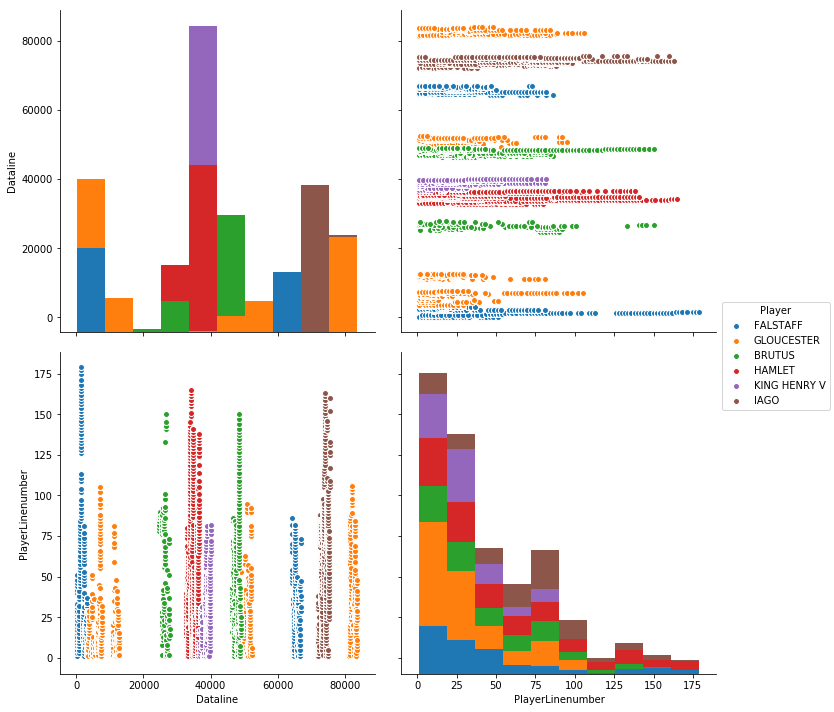

In [25]:
sns.pairplot(Player_top1000.drop("Play", axis=1), hue="Player", size=5)

In [26]:
# It's clear that based on the 'Dataline' we can determine the player fairly well

In [27]:
# Now, let's work only with the top Plays, i.e., those who appears more than 3500 times in our original dataset

In [28]:
Play_top3500=my_data_Shakespeare[my_data_Shakespeare['Play'].isin(counts_play[counts_play > 3500].index)]

In [29]:
#Taking a look in my new dataset: Play_top3500

In [30]:
Play_top3500.head()

,Dataline,Play,PlayerLinenumber,ActSceneLine,Player,PlayerLine
18565,18566,Antony and Cleopatra,52.0,NaN,ROSALIND,ACT I
18566,18567,Antony and Cleopatra,52.0,NaN,ROSALIND,SCENE I. Alexandria. A room in CLEOPATRA's pal...
18567,18568,Antony and Cleopatra,52.0,NaN,ROSALIND,Enter DEMETRIUS and PHILO
18568,18569,Antony and Cleopatra,1.0,1.1.1,PHILO,"Nay, but this dotage of our general's"
18569,18570,Antony and Cleopatra,1.0,1.1.2,PHILO,"O'erflows the measure: those his goodly eyes,"


In [31]:
Play_top3500.shape

(31236, 6)

In [32]:
# Notice that, compared to the original dataset, where we have 111,396 observations, now we have 31,236 observations

In [33]:
#Classification Models

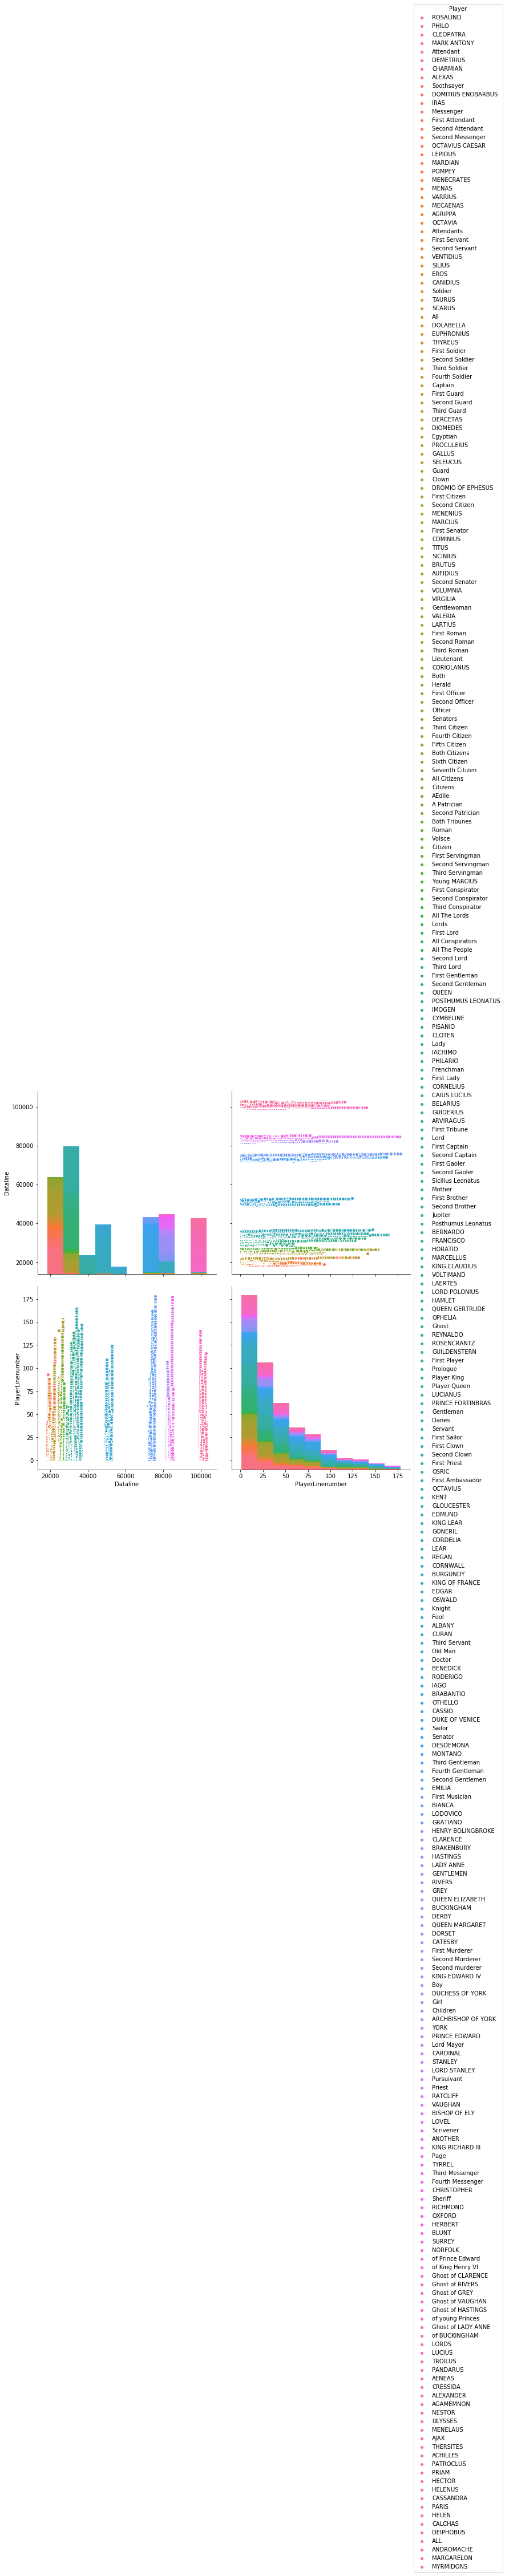

In [34]:
sns.pairplot(Play_top3500.drop("Play", axis=1), hue="Player", size=5)

In [35]:
# Finally, let's work with the top 6 players (those who appear more than 1000 times in our original dataset) AND
# the top 8 plays (those who appear more than 3500 times in our original dataset)

# Creating a new dataset

In [36]:
my_data_Shakespeare_new=my_data_Shakespeare[my_data_Shakespeare['Play'].isin(counts_play[counts_play > 3500].index)]
my_data_Shakespeare_new=my_data_Shakespeare_new[my_data_Shakespeare_new['Player'].isin(counts_player[counts_player > 1000].index)]

In [37]:
#Taking a look in my new dataset

In [38]:
my_data_Shakespeare_new.head()

,Dataline,Play,PlayerLinenumber,ActSceneLine,Player,PlayerLine
24756,24757,Coriolanus,78.0,1.1.265,BRUTUS,He has no equal.
24758,24759,Coriolanus,80.0,1.1.267,BRUTUS,Mark'd you his lip and eyes?
24760,24761,Coriolanus,82.0,1.1.269,BRUTUS,"Being moved, he will not spare to gird the gods."
24762,24763,Coriolanus,84.0,1.1.271,BRUTUS,The present wars devour him: he is grown
24763,24764,Coriolanus,84.0,1.1.272,BRUTUS,Too proud to be so valiant.


In [39]:
my_data_Shakespeare_new.shape

(4112, 6)

In [40]:
# Notice that, compared to the original dataset, where we have 111,396 observations, now we have 4,112 observations

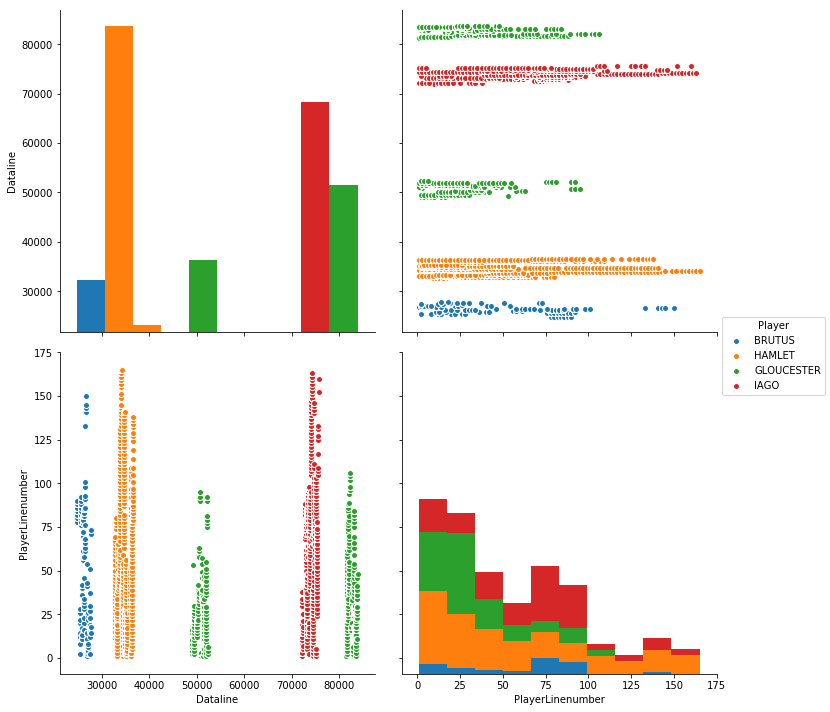

In [41]:
#Classification Models

sns.pairplot(my_data_Shakespeare_new.drop("Play", axis=1), hue="Player", size=5)

In [42]:
# It's clear that based on the 'Dataline' we can determine the player fairly well